In [1]:
import pandas as pd

data_clst = pd.read_csv('data/clustering_wholesale_customers.csv')

In [2]:
data_clst.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
print("""
No. of columns: {}
No. of rows: {}
No. of categorical columns: {}
No. of numerical columns: {}""".format(data_clst.shape[1],
                                      data_clst.shape[0],
                                      len(data_clst.select_dtypes('O').columns),
                                      len(data_clst.select_dtypes(['int','float']).columns)))


No. of columns: 6
No. of rows: 435
No. of categorical columns: 0
No. of numerical columns: 0


In [4]:
data_clst.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,435.0,12089.372414,12662.796341,3.0,3208.0,8565.0,16934.5,112151.0
Milk,435.0,5788.103448,7374.172350,112.0,1579.5,3634.0,7168.0,73498.0
Grocery,435.0,7911.158621,9365.740973,218.0,2156.0,4757.0,10665.5,92780.0
Frozen,435.0,3096.126437,4873.769559,25.0,770.5,1541.0,3559.5,60869.0
Detergents_Paper,435.0,2848.473563,4679.364623,3.0,260.0,813.0,3935.0,40827.0
Delicatessen,435.0,1536.797701,2833.363881,3.0,411.5,967.0,1825.5,47943.0


<Figure size 432x288 with 0 Axes>

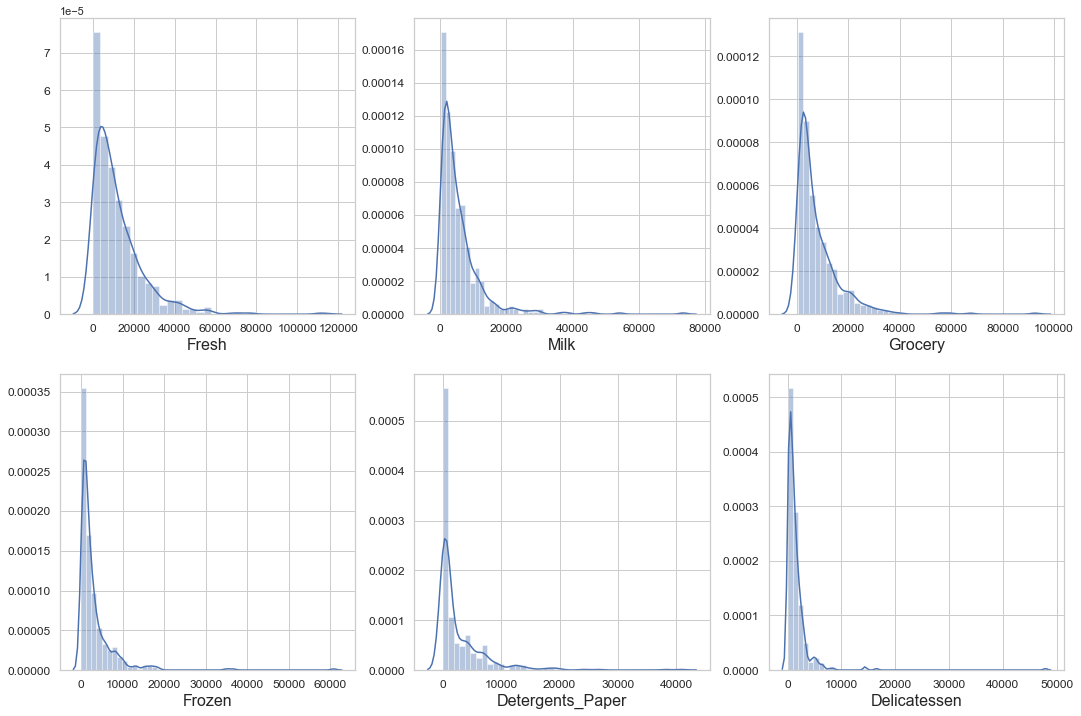

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,12))
    sns.set_style('whitegrid')
    
    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data_clst, data_clst.columns)

corr = data_clst.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True, fmt='0.2f', cmap='RdBu_r');

In [16]:
#preprocessing

pd.DataFrame(data_clst.isnull().sum(), columns=['Missing Values'])

,Missing Values
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicatessen,0


In [17]:
#scaling data

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scaler.fit(data_clst)
data_clst_scaled = scaler.transform(data_clst.values)
data_clst_scaled = pd.DataFrame(data_clst_scaled, columns = data_clst.columns)

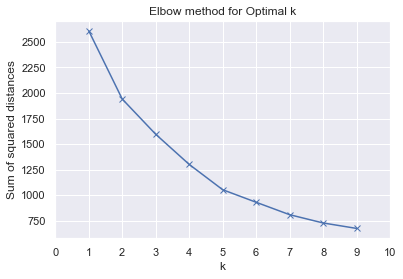

In [23]:
#finding number of k-clusters

from sklearn.cluster import KMeans

def plot_elbow(data):
    sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters = k, random_state = 1234)
        km = km.fit(data)
        sum_of_squared_distances.append(km.inertia_)
        
    plt.figure(figsize=(6,4))
    sns.set_style('darkgrid')
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.xlim(0,10)
    plt.xticks(np.arange(0,11,1))
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow method for Optimal k')
    plt.show();
    
plot_elbow(data_clst_scaled)

In [25]:
#training the model

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(data_clst_scaled)

KMeans(n_clusters=2)

In [26]:
#validation

preds = km.predict(data_clst_scaled)
labels = km.labels_
centers = km.cluster_centers_

In [27]:
#calculating Silhouette Score

from sklearn.metrics import silhouette_score

silhouette = silhouette_score(data_clst, labels, metric='euclidean')

print(silhouette)

0.5349220171014768


In [28]:
true_centers = scaler.inverse_transform(centers)

segments = ['Segment {}'.format(i+1) for i in range(0,len(true_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data_clst.keys())
true_centers.index = segments

true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 1,13113.0,20563.0,28641.0,4766.0,13161.0,4110.0
Segment 2,11983.0,4251.0,5754.0,2922.0,1775.0,1269.0


In [29]:
data_clst.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,435.0,12089.372414,12662.796341,3.0,3208.0,8565.0,16934.5,112151.0
Milk,435.0,5788.103448,7374.172350,112.0,1579.5,3634.0,7168.0,73498.0
Grocery,435.0,7911.158621,9365.740973,218.0,2156.0,4757.0,10665.5,92780.0
Frozen,435.0,3096.126437,4873.769559,25.0,770.5,1541.0,3559.5,60869.0
Detergents_Paper,435.0,2848.473563,4679.364623,3.0,260.0,813.0,3935.0,40827.0
Delicatessen,435.0,1536.797701,2833.363881,3.0,411.5,967.0,1825.5,47943.0


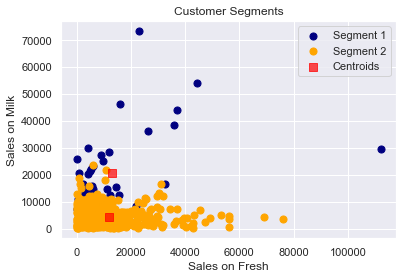

In [46]:
plt.scatter(data_clst[preds==0]['Fresh'], data_clst[preds==0]['Milk'], c='navy', s=50, label='Segment 1')
plt.scatter(data_clst[preds==1]['Fresh'], data_clst[preds==1]['Milk'], c='orange', s=50, label='Segment 2')

plt.scatter(true_centers['Fresh'],
            true_centers['Milk'],
            s=50, marker='s', c='red',
            alpha=0.7, label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Sales on Fresh')
plt.ylabel('Sales on Milk')
plt.legend()
plt.show()

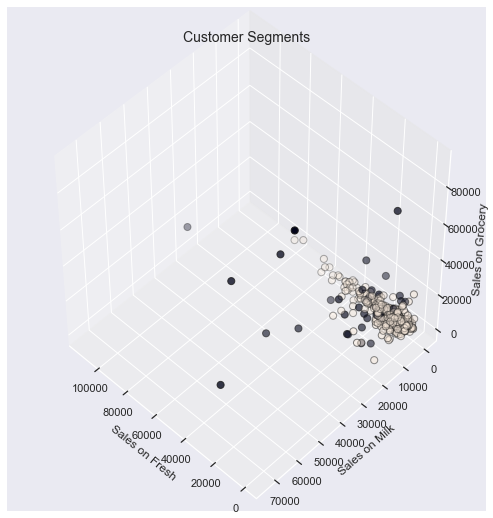

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(data_clst['Fresh'],
          data_clst['Milk'],
          data_clst['Grocery'],
          c=labels.astype(np.float),
          edgecolor='k', s=50)

ax.set_xlabel('Sales on Fresh')
ax.set_ylabel('Sales on Milk')
ax.set_zlabel('Sales on Grocery')

plt.title('Customer Segments', fontsize=14)
plt.show()